## k-means clustering algorithm
I have decided to use threadbare dateset of Iris for learning clustering as introduction for unsupervised learning algorithms. 

### Let's assume there is no target/label in dataset

In [153]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [154]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data)
df = df.rename(columns = dict(zip(list(df.columns), iris.feature_names)))                  
                  
y = pd.DataFrame(iris.target)

In [155]:
y.value_counts()

2    50
1    50
0    50
dtype: int64

In [156]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [157]:
df.iloc[:,2:]

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [176]:
km = KMeans(n_clusters=3, max_iter=100).fit(df.iloc[:,2:])

In [177]:
y_km = km.predict(df.iloc[:,2:])

In [178]:
pd.DataFrame(y_km).value_counts()

2    52
1    50
0    48
dtype: int64

In [194]:
label = pd.DataFrame(km.predict(df.iloc[:,2:]),columns = ['label'])
pred = pd.concat([df.iloc[:,2:],label],axis = 1)
pred = pred.replace({1:0,0:2,2:1})

pred

,petal length (cm),petal width (cm),label
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,1.0,2
148,5.4,2.3,2


In [195]:
true = pd.concat([df.iloc[:,2:],y],axis = 1).rename(columns = {0:'label'})
true

,petal length (cm),petal width (cm),label
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


In [196]:
false = pd.concat([df.iloc[:,2:], true.label-pred.label], axis = 1).rename(columns = {0:'label'})
false = false[false.label != 0]
false

,petal length (cm),petal width (cm),label
77,5.0,1.7,-1
83,5.1,1.6,-1
106,4.5,1.7,1
119,5.0,1.5,1
126,4.8,1.8,1
138,4.8,1.8,1


<AxesSubplot:ylabel='petal length (cm)'>

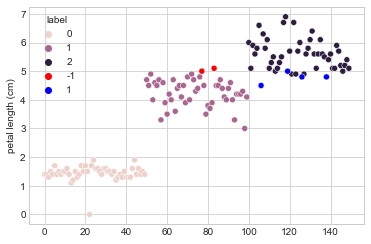

In [197]:
sns.scatterplot(pred.index, pred['petal length (cm)'], hue = pred.label)
sns.scatterplot(false.index, false['petal length (cm)'], hue = false.label, palette = ['r', 'b'])

<AxesSubplot:ylabel='petal width (cm)'>

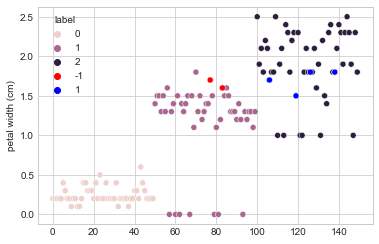

In [198]:
sns.scatterplot(pred.index, pred['petal width (cm)'], hue = pred.label)
sns.scatterplot(false.index, false['petal width (cm)'],hue = false.label, palette = ['r', 'b'])